In [1]:
import numpy as np
import matplotlib.pyplot as plt
import itertools
from math import factorial
from pylab import rcParams
from scipy.optimize import fsolve

## Урок № 3

### Задание  № 1

#### Нарисуйте график функции: ```y(x) = k∙cos(x – a) + b``` для некоторых (2-3 различных) значений параметров ```k, a, b```

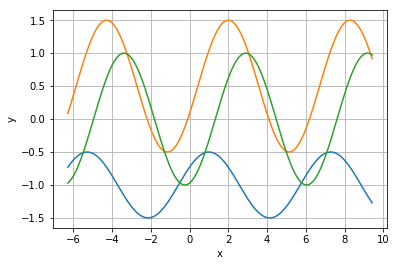

In [2]:
# y(x) = k∙cos(x – a) + b
x = np.linspace(-2*np.pi, 3*np.pi, 201)
k = [0.5, 1, 1]
a = [1, 2, 2.9]
b = [-1, 0.5, 0]
for i in range(3):
    plt.plot(x, k[i] * np.cos(x - a[i]) + b[i])
plt.xlabel('x')
plt.ylabel('y')
plt.grid(True)
plt.show()

### Задание № 3
#### Напишите код, который будет переводить полярные координаты в декартовы.

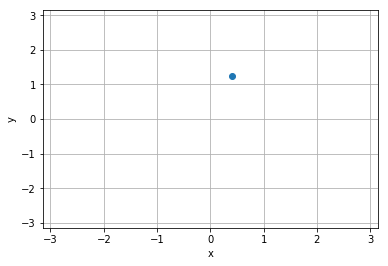

In [3]:
# Получение декартовых координат из полярных, гле R - радиус, alpha - угол в радианах
def get_cartesian(R, alpha):
    x = R * np.cos(alpha)
    y = R * np.sin(alpha)
    return x, y
    
x, y = get_cartesian(1.3, np.pi/2.5)

plt.xlabel('x')
plt.ylabel('y')
plt.xlim(-np.pi, np.pi)
plt.ylim(-np.pi, np.pi)
plt.plot(x, y, marker='o')
plt.grid(True)
plt.show()

#### Напишите код, который будет рисовать график окружности в полярных координатах.
```
Я не понял по заданию каким методом надо было сделать, поэтому сделал и так и так: plot(), polar()
```

In [4]:
# для удобства просмотра поменяем размер графика
rcParams['figure.figsize'] = 4, 4

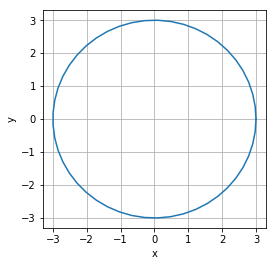

In [5]:
shape = 50
R = 3
alpha = 2 * np.pi

R = np.linspace(R, R, shape)
alpha = np.linspace(0, alpha, shape)

x, y = get_cartesian(R, alpha)

plt.plot(x, y)
plt.xlabel('x')
plt.ylabel('y')
plt.grid(True)
plt.show()

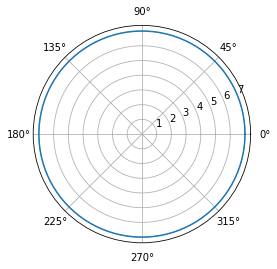

In [6]:
x = np.linspace(0, 2*np.pi, 100)
y = np.linspace(7, 7, 100)
plt.polar(x, y);

### Задание № 4
#### 1. Решите систему уравнений:
``` 
y = x**2 – 1 
exp(x) + x∙(1 – y) = 1
```

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in true_divide
  This is separate from the ipykernel package so we can avoid doing imports until


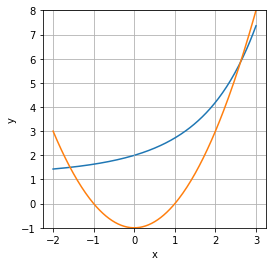

In [7]:
# Нарисуем графики
x = np.linspace(-2, 3, 201)
plt.plot(x, (np.exp(x) + x - 1)/x)
plt.plot(x, x**2 - 1)
plt.xlabel('x')
plt.ylabel('y')
plt.ylim(-1, 8)
plt.grid(True)
plt.show()

In [8]:
# Найдем корни
def equations(p):
    x, y = p
    return (y - x**2 + 1, np.exp(x) + x - x * y - 1)

x1, y1 = fsolve(equations, (-2, 1))
print(x1, y1)

x2, y2 = fsolve(equations, (2, 5))
print(x2, y2)

-1.581835352893692 1.502203083670816
2.6181455730830665 5.854686241850252


#### 2. Решите систему уравнений и неравенств:
```
y = x**2 – 1
exp(x) + x∙(1 – y) > 1
```

Выразим __y__ через оба уравнения:
```
y = x**2 - 1
y < (exp(x) + x - 1) / x
```

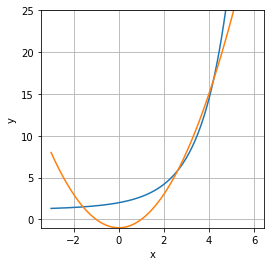

In [9]:
# Нарисуем графики, чтобы увидеть точки пересечения
x = np.linspace(-3, 6, 201)
plt.plot(x, (np.exp(x) + x - 1)/x)
plt.plot(x, x**2 - 1)
plt.xlabel('x')
plt.ylabel('y')
plt.ylim(-1, 25)
plt.grid(True)
plt.show()

По графику видно, что корни уравнения лежат примерно в следующих пределах оси __x__:  [-2, 2] и [4, inf]

Для решения задачи найдем точки пересечения графиков и укажем более точные значения __y__:

In [10]:
def equations(p):
    x, y = p
    return (y - x**2 + 1, np.exp(x) + x - x * y - 1)

x1, y1 = fsolve(equations, (-2, 2))
xy = np.array([x1, y1])

x2, y2 = fsolve(equations, (2, 5))
xy = np.append([xy], [[x2, y2]], axis=0)

x3, y3 = fsolve(equations, (4, 16))
xy = np.append(xy, [[x3, y3]], axis=0)
xy

array([[-1.58183535,  1.50220308],
       [ 2.61814557,  5.85468624],
       [ 4.20010584, 16.64088908]])

Таким образом получаем, что корни системы уравнений и неравенств лежат на параболе ```y = (x**2 - 1)``` в пределах следующих значений оси __x__:

In [11]:
print(f'x: ({xy[0,0]}, {xy[1,0]})')
print(f'x: ({xy[2,0]}, inf]')

x: (-1.581835352895898, 2.6181455730830665)
x: (4.200105841136901, inf]


## Урок № 4

### Задание № 1

#### Напишите код, моделирующий выпадение поля в рулетке (с учетом поля зеро)

In [12]:
q = ''
while(True):
    q = input(f'Введите значение от 0 до 36 включительно ')
    if q == 'q': 
        break
    x = np.random.randint(0, 37)
    if q == str(x):
        print(f'************  У нас везунчик!!!  ************')
        print(f'Вы угадали, выпало значение: {x}\n')
    else:
        print(f'Извините, вы проиграли. Выпало значение: {x}\n')

Введите значение от 0 до 36 включительно 6
Извините, вы проиграли. Выпало значение: 19

Введите значение от 0 до 36 включительно 6
Извините, вы проиграли. Выпало значение: 8

Введите значение от 0 до 36 включительно 6
Извините, вы проиграли. Выпало значение: 30

Введите значение от 0 до 36 включительно 6
************  У нас везунчик!!!  ************
Вы угадали, выпало значение: 6

Введите значение от 0 до 36 включительно q


### Задание № 2

#### 1. Напишите код, проверяющий любую из теорем сложения или умножения вероятности на примере модели рулетки

In [13]:
distrib = np.array([0]*37)
n = 100000
for i in range(n):
    x = np.random.randint(0, 37)
    distrib[x] += 1
distrib

array([2676, 2774, 2752, 2678, 2644, 2728, 2733, 2710, 2732, 2651, 2717,
       2786, 2697, 2851, 2718, 2718, 2715, 2847, 2701, 2713, 2648, 2683,
       2583, 2565, 2713, 2759, 2714, 2661, 2656, 2675, 2757, 2652, 2732,
       2688, 2650, 2639, 2684])

Теорема сложения вероятности доказывается достаточно легко. Необходимо посчитать Относительную Частоту W(A) выпадения каждого числа и посчитать их сумму, т.к. при достаточно больших __n__  ```W(A) -> P(A)```:

In [14]:
sum_roulette = 0
for i in distrib:
    sum_roulette += i / n
sum_roulette

0.9999999999999999

Так как сумма получается очень близка единице, то, с учетом погрешности, теорема сложения вероятностей группы несовместных событий доказана. 

#### 2. Сгенерируйте десять выборок случайных чисел ```х0, …, х9```. и постройте гистограмму распределения случайной суммы ```х0+х1+ …+ х9```.

In [15]:
x = [0]*10
for i in range(10):
    x[i] = np.random.rand(1000)

In [16]:
xz = x[0]+x[1]+x[2]+x[3]+x[4]+x[5]+x[6]+x[7]+x[8]+x[9]

Text(0.5, 1.0, 'Distribution')

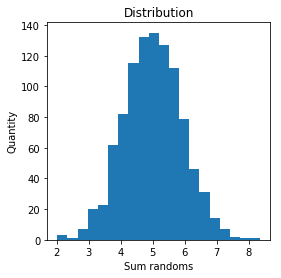

In [17]:
num_bins = 20
n, bins, patches = plt.hist(xz, num_bins)
plt.xlabel('Sum randoms')
plt.ylabel('Quantity')
plt.title('Distribution')

### Задание № 3

#### 1. Дополните код Монте-Карло последовательности независимых испытаний расчетом соответствующих вероятностей (через биномиальное распределение) и сравните результаты.

In [18]:
def monte_carlo(k=2, n=4):
    luck, sample = 0, 100000

    x = np.array([0]*sample)
    for i in range(n):
        x += np.random.randint(0, 2, sample)
    
    for i in range(0, sample):
        if x[i] == k:
            luck = luck + 1
    print(f'Выборка: {sample}, успехов в выборке: {luck}, соотношение: {luck/sample}')

    p = (factorial(n) / (factorial(k) * factorial(n - k))) / 2**n
    print(f'Вероятность выпадения {k} успехов в {n} испытаний равна: p = {round(p, 3)}')

In [19]:
monte_carlo()

Выборка: 100000, успехов в выборке: 37571, соотношение: 0.37571
Вероятность выпадения 2 успехов в 4 испытаний равна: p = 0.375


#### 2. Повторите расчеты, взяв другие значения n и k.

In [20]:
monte_carlo(1, 4)

Выборка: 100000, успехов в выборке: 24941, соотношение: 0.24941
Вероятность выпадения 1 успехов в 4 испытаний равна: p = 0.25


In [21]:
monte_carlo(2, 5)

Выборка: 100000, успехов в выборке: 31182, соотношение: 0.31182
Вероятность выпадения 2 успехов в 5 испытаний равна: p = 0.312


_Проверим весь ряд успехов от __одного__ до __восьми__ в __восьми__ испытаниях:_

In [22]:
monte_carlo(1, 8)

Выборка: 100000, успехов в выборке: 3082, соотношение: 0.03082
Вероятность выпадения 1 успехов в 8 испытаний равна: p = 0.031


In [23]:
monte_carlo(2, 8)

Выборка: 100000, успехов в выборке: 10988, соотношение: 0.10988
Вероятность выпадения 2 успехов в 8 испытаний равна: p = 0.109


In [24]:
monte_carlo(3, 8)

Выборка: 100000, успехов в выборке: 22010, соотношение: 0.2201
Вероятность выпадения 3 успехов в 8 испытаний равна: p = 0.219


In [25]:
monte_carlo(4, 8)

Выборка: 100000, успехов в выборке: 27491, соотношение: 0.27491
Вероятность выпадения 4 успехов в 8 испытаний равна: p = 0.273


In [26]:
monte_carlo(5, 8)

Выборка: 100000, успехов в выборке: 21695, соотношение: 0.21695
Вероятность выпадения 5 успехов в 8 испытаний равна: p = 0.219


In [27]:
monte_carlo(6, 8)

Выборка: 100000, успехов в выборке: 10919, соотношение: 0.10919
Вероятность выпадения 6 успехов в 8 испытаний равна: p = 0.109


In [28]:
monte_carlo(7, 8)

Выборка: 100000, успехов в выборке: 3229, соотношение: 0.03229
Вероятность выпадения 7 успехов в 8 испытаний равна: p = 0.031


In [29]:
monte_carlo(8, 8)

Выборка: 100000, успехов в выборке: 384, соотношение: 0.00384
Вероятность выпадения 8 успехов в 8 испытаний равна: p = 0.004


#### 4. Повторите расчеты, взяв другие значения n и k.

_Разммещения:_

In [30]:
for p in itertools.permutations("0123",2):
    print(''.join(str(x) for x in p))

01
02
03
10
12
13
20
21
23
30
31
32


In [31]:
for p in itertools.permutations("012",2):
    print(''.join(str(x) for x in p))

01
02
10
12
20
21


In [32]:
for p in itertools.permutations("012",3):
    print(''.join(str(x) for x in p))

012
021
102
120
201
210


In [33]:
for p in itertools.permutations("01234",2):
    print(''.join(str(x) for x in p))

01
02
03
04
10
12
13
14
20
21
23
24
30
31
32
34
40
41
42
43


_Сочетания:_

In [34]:
for p in itertools.combinations("0123",2):
    print(''.join(p))

01
02
03
12
13
23


In [35]:
for p in itertools.combinations("0123",3):
    print(''.join(p))

012
013
023
123


In [36]:
for p in itertools.combinations("01234",3):
    print(''.join(p))

012
013
014
023
024
034
123
124
134
234


#### 5. Дополните код расчетом коэффициента корреляции x и y по формуле
```
R = ...
```

In [39]:
rcParams['figure.figsize'] = 6, 4

a = 0.7262247310503457, b = 0.12690468273066258
a1 = 0.7262247310503444, b1 = 0.12690468273066316

c = 0.9300701028770999
c1 = [[1.        0.9300701]
 [0.9300701 1.       ]]


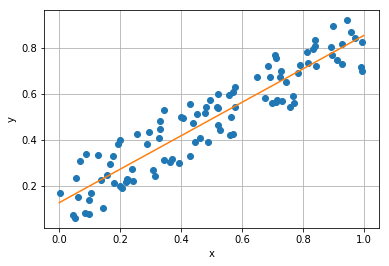

In [40]:
n = 100
r = 0.7
x = np.random.rand(n)
y = r*x + (1 - r)*np.random.rand(n)
plt.plot(x, y, 'o')
plt.xlabel('x')
plt.ylabel('y')
plt.grid(True)

a = (np.sum(x)*np.sum(y) - n*np.sum(x*y))/(np.sum(x)*np.sum(x) - n*np.sum(x*x))
b = (np.sum(y) - a*np.sum(x))/n

A = np.vstack([x, np.ones(len(x))]).T
a1, b1 = np.linalg.lstsq(A, y, rcond=None)[0]
print(f'a = {a}, b = {b}')
print(f'a1 = {a1}, b1 = {b1}')

c = np.sum((x - np.mean(x)) * (y - np.mean(y))) / (np.sum((x - np.mean(x))**2) * np.sum((y - np.mean(y))**2))**0.5

c1 = np.corrcoef(x, y) 
print(f'\nc = {c}')
print(f'c1 = {c1}')

plt.plot([0, 1], [b, a + b])
plt.show()